Show example cross-hippocampal coronal slices for included sites in the dataset. 

In [1]:
from armed.misc import expand_data_path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
strSliceDir = expand_data_path('ADNI23_sMRI/right_hippocampus_slices_2pctnorm/coronal_MNI-6_qc/good')
dfImageInfo = pd.read_csv('image_list_ad_cn.csv', index_col=0)
# Keep first image per subject
# dfImageInfo = dfImageInfo.loc[~dfImageInfo['RID'].duplicated()]

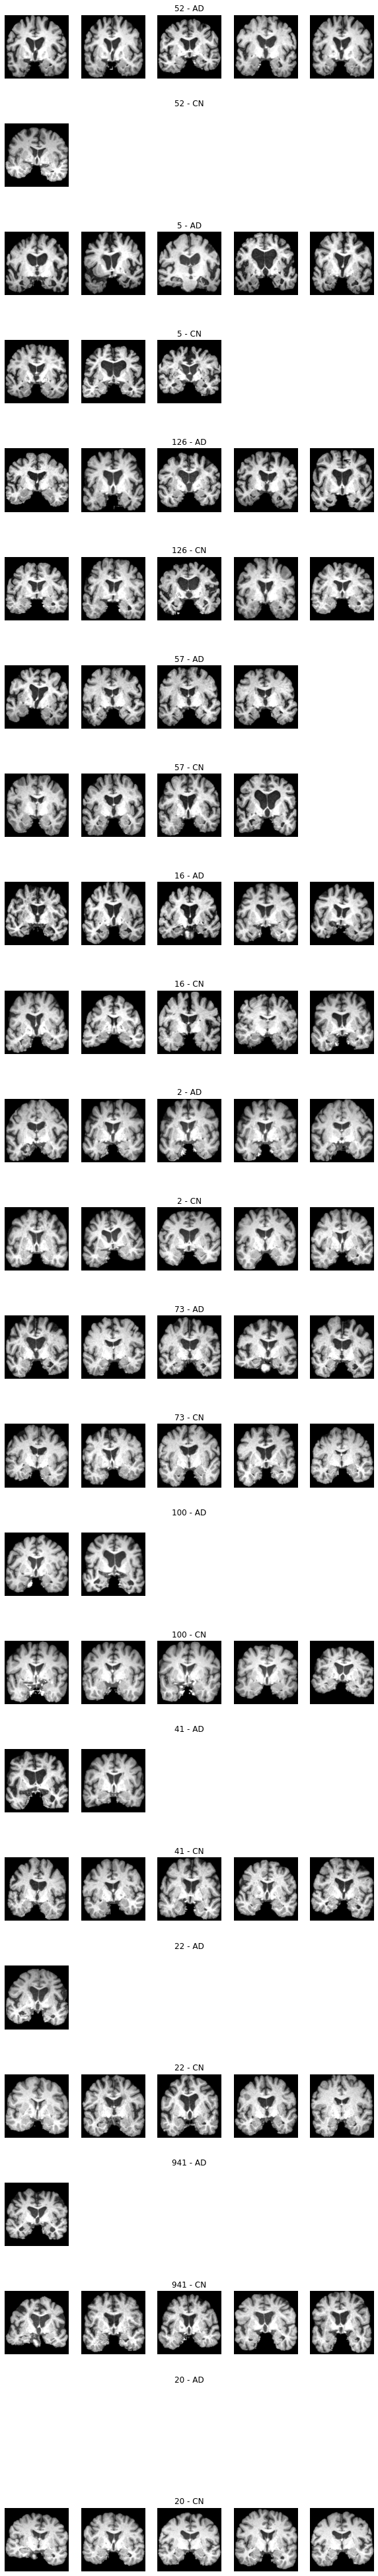

In [12]:
# arrSites = dfImageInfo['Site'].unique()
arrSites = np.array([52, 5, 126, 57, 16, 2, 73, 100, 41, 22, 941, 20])
nSites = arrSites.shape[0]

fig, ax = plt.subplots(nSites*2, 5, figsize=(10, nSites * 6))
for iSite, site in enumerate(arrSites):
    dfImagesSite = dfImageInfo.loc[dfImageInfo['Site'] == site]
    
    dfImagesAD = dfImagesSite.loc[dfImagesSite['DX_Scan'] == 'Dementia']
    dfImagesCN = dfImagesSite.loc[dfImagesSite['DX_Scan'] == 'CN']
    
    # Shuffle
    dfImagesAD = dfImagesAD.sample(frac=1.0, replace=False)
    dfImagesCN = dfImagesCN.sample(frac=1.0, replace=False)
    
    iImage = 0
    iFig = 0
    while (iImage < dfImagesAD.shape[0]) & (iFig < 5):
        strT1wPath = dfImagesAD['T1w_Path'].iloc[iImage]
        strBaseName = os.path.basename(strT1wPath).split('T1w')[0]
        strSlicePath = os.path.join(strSliceDir, strBaseName + dfImagesAD['DX_Scan'].iloc[iImage] + '.png')
                
        if os.path.exists(strSlicePath):
            img = np.array(Image.open(strSlicePath))
            ax[iSite * 2, iFig].imshow(img, cmap='gray')
            iFig += 1
        iImage += 1
    ax[iSite * 2, 2].set_title(str(site) + ' - AD')
        
    iImage = 0
    iFig = 0
    while (iImage < dfImagesCN.shape[0]) & (iFig < 5):
        strT1wPath = dfImagesCN['T1w_Path'].iloc[iImage]
        strBaseName = os.path.basename(strT1wPath).split('T1w')[0]
        strSlicePath = os.path.join(strSliceDir, strBaseName + dfImagesCN['DX_Scan'].iloc[iImage] + '.png')
                
        if os.path.exists(strSlicePath):
            img = np.array(Image.open(strSlicePath))
            ax[iSite * 2 + 1, iFig].imshow(img, cmap='gray')
            iFig += 1
        iImage += 1
    
    ax[iSite * 2 + 1, 2].set_title(str(site) + ' - CN')
        
for a in ax.flatten():
    a.axis('off')